In [1]:
from matplotlib import pyplot as plt
from whar_datasets.adapters.pytorch import PytorchAdapter
from whar_datasets.support.getter import WHARDatasetID, get_whar_cfg

In [2]:
cfg = get_whar_cfg(WHARDatasetID.UCI_HAR)
dataset = PytorchAdapter(cfg, override_cache=False)

Creating config hash...
Checking windowing...
Loading config hash...
Windowing is up-to-date.
subject_ids: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
activity_ids: [0 1 2 3 4 5]


In [11]:
train_loader, val_loader, test_loader = dataset.get_dataloaders(train_batch_size=32)

Getting normalization parameters...
train: 3457 | val: 712 | test: 672


In [12]:
weights = dataset.get_class_weights(train_loader)
print(weights)

{2: 0.8420623700300922, 0: 0.862663284281593, 1: 0.9279305722371082, 3: 0.9710529912567328, 5: 1.1397611877174985, 4: 1.256529594476975}


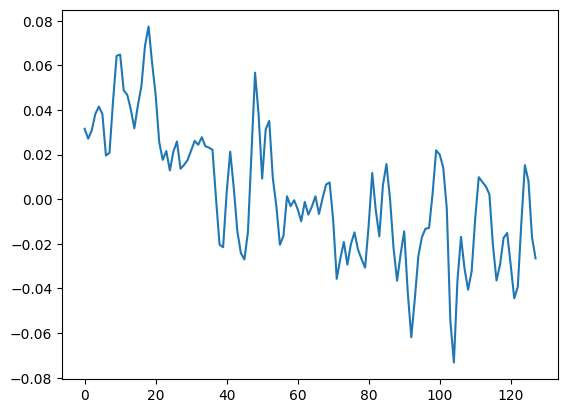

In [13]:
y, x = next(iter(train_loader))

plt.plot(x[0, :, 0])
plt.show()